<a href="https://colab.research.google.com/github/Alepepi/P3IAGA/blob/main/Proyecto_3_Traveling_Salesman_167282.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import the necessary libraries
import numpy as np
import random
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
'''The list of cities and their connections (distances and costs):

1. London to Paris,            time: 2:16 hours (136 min), price:  98
2. London to Brussels,         time: 2:22 hours (142 min), price:  98

3. Paris to London,            time: 2:16 hours (136 min), price:  98
4. Paris to Brussels,          time: 1:22 hours ( 82 min), price:  80
5. Paris to Barcelona,         time: 6:30 hours (390 min), price: 400
6. Paris to Lyon,              time: 1:52 hours (112 min), price: 185
7. Paris to Frankfurt,         time: 8:00 hours (480 min), price: 345
8. Paris to Madrid,            time: 3:45 hours (225 min), price: 380

9. Marid to Paris,             time: 3:45 hours (225 min), price: 380
10. Madrid to Barcelona,       time: 2:30 hours (150 min), price:  98

11. Barcelona to Lyon,         time: 3:20 hours (200 min), price: 320
12. Barcelona to Madrid,       time: 2:30 hours (150 min), price:  98
13. Barcelona to Paris,        time: 6:30 hours (390 min), price: 400

14. Lyon to Milan,             time: 2:56 hours (176 min), price: 180
15. Lyon to Paris,             time: 1:52 hours (112 min), price: 185
16. Lyon to Barcelona,         time: 3:20 hours (200 min), price: 320

17. Rome to Milan,             time: 2:48 hours (168 min), price: 125

18. Milan to Rome,             time: 2:48 hours (168 min), price: 125
19. Milan to Frankfurt,        time: 7:34 hours (454 min), price: 240
20. Milan to Lyon,             time: 2:56 hours (176 min), price: 180

21. Frankfurt to Cologne,      time: 2:00 hours (120 min), price:  40
22. Frankfurt to Berlin,       time: 3:52 hours (232 min), price: 125
23. Frankfurt to Paris,        time: 8:00 hours (480 min), price: 345
24. Frankfurt to Milan,        time: 7:34 hours (454 min), price: 240

25. Berlin to Amsterdam,       time: 6:04 hours (364 min), price: 235
26. Berlin to Frankfurt,       time: 3:52 hours (232 min), price: 125

27. Amsterdam to Cologne,      time: 2:00 hours (120 min), price:  40
28. Amsterdam to Berlin,       time: 6:04 hours (364 min), price: 235
29. Amsterdam to Brussels,     time: 1:45 hours (105 min), price:  48

30. Cologne to Amsterdam,      time: 2:00 hours (120 min), price:  40
31. Cologne to Frankfurt,      time: 2:00 hours (120 min), price:  40

32. Brussels to London,        time: 2:22 hours (142 min), price:  98
33. Brussels to Paris,         time: 1:22 hours ( 82 min), price:  80
34. Brussels to Amsterdam,     time: 1:45 hours (105 min), price:  48
'''	

'The list of cities and their connections (distances and costs):\n\n1. London to Paris,            time: 2:16 hours (136 min), price:  98\n2. London to Brussels,         time: 2:22 hours (142 min), price:  98\n\n3. Paris to London,            time: 2:16 hours (136 min), price:  98\n4. Paris to Brussels,          time: 1:22 hours ( 82 min), price:  80\n5. Paris to Barcelona,         time: 6:30 hours (390 min), price: 400\n6. Paris to Lyon,              time: 1:52 hours (112 min), price: 185\n7. Paris to Frankfurt,         time: 8:00 hours (480 min), price: 345\n8. Paris to Madrid,            time: 3:45 hours (225 min), price: 380\n\n9. Marid to Paris,             time: 3:45 hours (225 min), price: 380\n10. Madrid to Barcelona,       time: 2:30 hours (150 min), price:  98\n\n11. Barcelona to Lyon,         time: 3:20 hours (200 min), price: 320\n12. Barcelona to Madrid,       time: 2:30 hours (150 min), price:  98\n13. Barcelona to Paris,        time: 6:30 hours (390 min), price: 400\n\n1

In [ ]:
inf = float('inf')
distances = [
    #London   Paris   Brussels  Madrid  Barcelona Lyon   Frankfurt  Milan   Rome   Cologne  Berlin   Amsterdam
    [ inf,    136,    142,      inf,    inf,      inf,   inf,       inf,    inf,   inf,     inf,     inf],  # London
    [136,     inf,     82,      225,    390,      112,   480,       inf,    inf,   inf,     inf,     inf],  # Paris
    [142,      82,    inf,      inf,    inf,      inf,   inf,       inf,    inf,   inf,     inf,     105],  # Brussels
    [inf,     225,    inf,      inf,    150,      inf,   inf,       inf,    inf,   inf,     inf,     inf],  # Madrid
    [inf,     390,    inf,      150,    inf,      200,   inf,       inf,    inf,   inf,     inf,     inf],  # Barcelona
    [inf,     112,    inf,      inf,    200,      inf,   inf,       176,    inf,   inf,     inf,     inf],  # Lyon
    [inf,     480,    inf,      inf,    inf,      inf,   inf,       454,    inf,   120,     232,     inf],  # Frankfurt
    [inf,     inf,    inf,      inf,    inf,      176,   454,       inf,    168,   inf,     inf,     inf],  # Milan
    [inf,     inf,    inf,      inf,    inf,      inf,   inf,       168,    inf,   inf,     inf,     inf],  # Rome
    [inf,     inf,    inf,      inf,    inf,      inf,   120,       inf,    inf,   inf,     inf,     120],  # Cologne
    [inf,     inf,    inf,      inf,    inf,      inf,   232,       inf,    inf,   inf,     inf,     364],  # Berlin
    [inf,     inf,    105,      inf,    inf,      inf,   inf,       inf,    inf,   120,     364,     inf]   # Amsterdam
]

costs = [
    #London   Paris   Brussels  Madrid  Barcelona Lyon   Frankfurt  Milan   Rome   Cologne  Berlin   Amsterdam
    [  0,      98,     98,      inf,    inf,      inf,    inf,       inf,    inf,   inf,     inf,     inf],  # London
    [ 98,       0,     80,      380,    400,      185,    345,       inf,    inf,   inf,     inf,     inf],  # Paris
    [ 98,      80,      0,      inf,    inf,      inf,    inf,       inf,    inf,   inf,     inf,      48],  # Brussels
    [inf,     380,    inf,        0,     98,      inf,    inf,       inf,    inf,   inf,     inf,     inf],  # Madrid
    [inf,     400,    inf,       98,      0,      320,    inf,       inf,    inf,   inf,     inf,     inf],  # Barcelona
    [inf,     185,    inf,      inf,    320,        0,    inf,       180,    inf,   inf,     inf,     inf],  # Lyon
    [inf,     345,    inf,      inf,    inf,      inf,      0,       240,    inf,    40,     125,     inf],  # Frankfurt
    [inf,     inf,    inf,      inf,    inf,      180,    240,         0,    125,   inf,     inf,     inf],  # Milan
    [inf,     inf,    inf,      inf,    inf,      inf,    inf,       125,      0,   inf,     inf,     inf],  # Rome
    [inf,     inf,    inf,      inf,    inf,      inf,    40,       inf,    inf,     0,     inf,      40],  # Cologne
    [inf,     inf,    inf,      inf,    inf,      inf,    125,       inf,    inf,   inf,       0,     235],  # Berlin
    [inf,     inf,     48,      inf,    inf,      inf,    inf,       inf,    inf,    40,     235,       0]   # Amsterdam
    
]

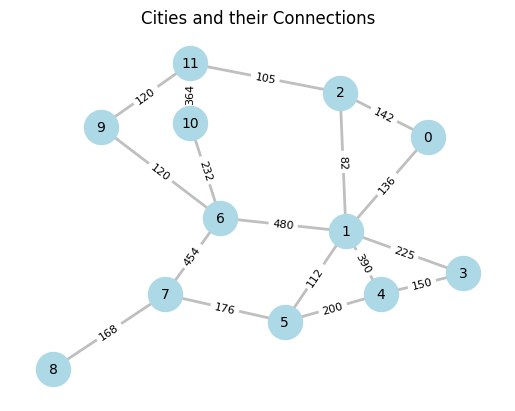

In [ ]:
# Create a graph from the matrix
G = nx.Graph()
for i in range(len(distances)):
  for j in range(i+1, len(distances)):
    if distances[i][j] != float('inf'):
      G.add_edge(i, j, weight=distances[i][j])

# Use the spring layout algorithm to position the nodes
pos = nx.spring_layout(G)

# Draw the graph with labels for each node and edge weights
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=600)
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
nx.draw_networkx_edges(G, pos, edge_color='gray', width=2, alpha=0.5)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'), font_size=8, font_family='sans-serif')

# Show the plot
plt.axis('off')
plt.title('Cities and their Connections')
plt.show()

In [ ]:
# City indices
london = 0
paris = 1
brussels = 2
madrid = 3
barcelona = 4
lyon = 5
frankfurt = 6
milan = 7
rome = 8
cologne = 9
berlin = 10
amsterdam = 11

In [ ]:
import random

# Genetic algorithm parameters
population_size = 20
mutation_rate = 0.1
elite_size = 10
generations = 1000
tournament_size = 5

In [ ]:
#Create an individual
def create_individual():
  chromosome_length = random.randint(len(distances), 20)
  individual = []
  inicio = (random.randint(0,11))
  individual.append(inicio)
  #print('inicio=') 
  #print(inicio)
  anterior = inicio
  x = 0

  while x < chromosome_length-2:
    #print('x=')
    #print(x)
    siguiente  = (random.randint(0,11))
    #print('siguiente=')
    #print(siguiente)
    print('individual=')
    print(individual)

    if(distances[anterior][siguiente]) != inf:
      individual.append(siguiente)
      #print('individual')
      #print(individual)
      x = x+1

    anterior=siguiente

  #individual = list(range(x))
  #random.shuffle(individual)
  #print('individual')
  #print(individual)
  return individual

In [ ]:
# Calculate fitness of an individual
def calculate_fitness(individual):
  total_cost = 0
 # print('individua length')
 # print(len(individual))
  for i in range(len(individual)-1):
    current_node = individual[i]
    next_node = individual[(i+1)]
    total_cost += distances[current_node][next_node]
    #print(total_cost)
  return total_cost

In [ ]:
#Perform tournament selection
def selection(population, fitness_scores):
  selected = []
  for i in range(len(population)):
    tournament = random.sample(range(len(population)), tournament_size)
    tournament_fitness = [fitness_scores[j] for j in tournament]
    selected_index = tournament[np.argmin(tournament_fitness)]
    selected.append(population[selected_index])
    #print(selected)
  return selected

In [ ]:
# Code to perform crossover between two parents
def crossover(parent1, parent2):
  # Perform uniform crossover
  child = [-1] * len(parent1) # llena lista de -1
  if len(parent1)<len(parent2):
    longitud_min =  len(parent1)
  else:
    longitud_min =  len(parent2)
  for i in range(longitud_min):
    if parent1[i] == parent2[i]:
      child[i] = parent1[i]
    else:
      child[i] = random.choice([parent1[i], parent2[i]])
  return child

In [ ]:
"""#Code to perform crossover between two parents
def crossover(parent1, parent2):
  #Perform uniform crossover
  child = [-1] * len(parent1)
  for i in range(len(parent1)):
    if parent1[i] == parent2[i]:
      child[i] = parent1[i]
    else:
      child[i] = random.choice([parent1[i], parent2[i]])
  return child"""

'#Code to perform crossover between two parents\ndef crossover(parent1, parent2):\n  #Perform uniform crossover\n  child = [-1] * len(parent1)\n  for i in range(len(parent1)):\n    if parent1[i] == parent2[i]:\n      child[i] = parent1[i]\n    else:\n      child[i] = random.choice([parent1[i], parent2[i]])\n  return child'

In [ ]:
#Perform mutation on an individual
def mutate(individual):
  # Swap two cities with a certain probability
  if random.random() < mutation_rate:
    # Choose two distinct indices to swap
    i = random.randint(1, len(individual)-1)
    individual[i], individual[i-1] = individual[i-1], individual[i]
  return individual

In [ ]:
#Create initial population
population = [create_individual() for i in range(population_size)]

#Initialize variables to track best individual and its fitness
best_individual = []
best_fitness = float('inf')
fitnesses = []

#Run through generations
for generation in range(generations):
  #Evaluate fitness of each individual
  fitness_scores = [calculate_fitness(individual) for individual in population]
  #print(fitness_scores)
  min_fitness = min(fitness_scores)
  print('min_fitness')
  print(min_fitness)

  #Perform elitism
  elite_population = [population[i] for i in np.argsort(fitness_scores)[:elite_size]]
  print('elite')
  print(elite_population)

  #Perform selection to generate new population
  selected_population = selection(population, fitness_scores)

  #Perform crossover and mutation to create children
  children_population = []
  for i in range(int((population_size - elite_size)/2)):
    parent1, parent2 = random.sample(selected_population, 2)
    child1 = crossover(parent1, parent2)
    child1 = mutate(child1)
    child2 = crossover(parent2, parent1)
    child2 = mutate(child2)
    children_population.append(child1)
    children_population.append(child2)

    #Create new population by combining the elite and children populations
    population = elite_population + children_population
  else:
    population = [create_individual() for i in range(population_size)]

  #definnir donde no es inf
  if(min_fitness != 'inf'):
    min_index = fitness_scores.index(min_fitness)
    print(min_index)
    if min_fitness < best_fitness:
      best_fitness = min_fitness
      best_individual = population[min_index]
      print('best individual')
      print(best_individual)
      fitnesses.append(np.mean(fitness_scores))
    else:
      print("no found")

Streaming output truncated to the last 5000 lines.
individual=
[3, 9, 2, 1, 4, 6, 7, 8, 1, 4, 1, 10, 11, 1, 2, 11, 10]
individual=
[3, 9, 2, 1, 4, 6, 7, 8, 1, 4, 1, 10, 11, 1, 2, 11, 10]
individual=
[3, 9, 2, 1, 4, 6, 7, 8, 1, 4, 1, 10, 11, 1, 2, 11, 10]
individual=
[3, 9, 2, 1, 4, 6, 7, 8, 1, 4, 1, 10, 11, 1, 2, 11, 10]
individual=
[3, 9, 2, 1, 4, 6, 7, 8, 1, 4, 1, 10, 11, 1, 2, 11, 10]
individual=
[3, 9, 2, 1, 4, 6, 7, 8, 1, 4, 1, 10, 11, 1, 2, 11, 10]
individual=
[3, 9, 2, 1, 4, 6, 7, 8, 1, 4, 1, 10, 11, 1, 2, 11, 10]
individual=
[3, 9, 2, 1, 4, 6, 7, 8, 1, 4, 1, 10, 11, 1, 2, 11, 10]
individual=
[3, 9, 2, 1, 4, 6, 7, 8, 1, 4, 1, 10, 11, 1, 2, 11, 10]
individual=
[3, 9, 2, 1, 4, 6, 7, 8, 1, 4, 1, 10, 11, 1, 2, 11, 10]
individual=
[3, 9, 2, 1, 4, 6, 7, 8, 1, 4, 1, 10, 11, 1, 2, 11, 10]
individual=
[3, 9, 2, 1, 4, 6, 7, 8, 1, 4, 1, 10, 11, 1, 2, 11, 10]
individual=
[3, 9, 2, 1, 4, 6, 7, 8, 1, 4, 1, 10, 11, 1, 2, 11, 10]
individual=
[0]
individual=
[0]
individual=
[0]
individual=
[0]
i

In [ ]:
'''#Perform elitism
elite_population = [population[i] for i in np.argsort(fitness_scores)[:elite_size]]

#Perform selection to generate new population
selected_population = selection(population, fitness_scores)'''

'#Perform elitism\nelite_population = [population[i] for i in np.argsort(fitness_scores)[:elite_size]]\n\n#Perform selection to generate new population\nselected_population = selection(population, fitness_scores)'

In [ ]:
#Print the best individual and its fitness
print("Best individual: ", best_individual)
print("Fitness: ", best_fitness)

Best individual:  [6, 5, 1, 0, 1, 10, 5, 4, 5, 3, 9, 9, 7]
Fitness:  1339


In [ ]:
"""#Create a graph to visualize the results
graph = nx.Graph()
for i in range(len(distances)-1):
  for j in range(i+1, len(distances)-1):
    if distances[i][j] != float('inf'):
      graph.add_edge(i, j, weight=distances[i][j])
      pos = nx.spring_layout(graph)
      nx.draw(graph, pos, node_color='lightblue', with_labels=True)
      
      best_individual_edges.append = [(best_individual[i], best_individual[(i+1)])]
      #best_individual_edges = [(best_individual[i], best_individual[(i+1)]) for i in range(len(best_individual))]
      nx.draw_networkx_edges(graph, pos, edgelist=best_individual_edges, edge_color='red', width=2)
plt.show()"""

"#Create a graph to visualize the results\ngraph = nx.Graph()\nfor i in range(len(distances)-1):\n  for j in range(i+1, len(distances)-1):\n    if distances[i][j] != float('inf'):\n      graph.add_edge(i, j, weight=distances[i][j])\n      pos = nx.spring_layout(graph)\n      nx.draw(graph, pos, node_color='lightblue', with_labels=True)\n      \n      best_individual_edges.append = [(best_individual[i], best_individual[(i+1)])]\n      #best_individual_edges = [(best_individual[i], best_individual[(i+1)]) for i in range(len(best_individual))]\n      nx.draw_networkx_edges(graph, pos, edgelist=best_individual_edges, edge_color='red', width=2)\nplt.show()"